# Análisis Exploratorio y Visualización

## 0. Importación de Librerías

In [5]:

import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
import math
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')


## 1. Importación del Conjunto de Datos y EDA
### 1.1. Importación del Dataset y Visualización de su Estructura 

Continuamos con la importación de los datos que son del interés del ejercicio y que están disponibles en el sitio <https://archive.ics.uci.edu> en el siguiente [enlace](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

In [6]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 

X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets
  
# data (as pandas dataframes) 
df = pd.concat([X, y], axis=1)



### 1.2. Descripción de los Atributos del Dataset

In [7]:

# variable information 
variable_info = predict_students_dropout_and_academic_success.variables
variable_info

,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,None,no
1,Application mode,Feature,Integer,None,1 - 1st phase - general contingent 2 - Ordinan...,None,no
2,Application order,Feature,Integer,None,Application order (between 0 - first choice; a...,None,no
3,Course,Feature,Integer,None,33 - Biofuel Production Technologies 171 - Ani...,None,no
4,Daytime/evening attendance,Feature,Integer,None,1 – daytime 0 - evening,None,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,None,no
6,Previous qualification (grade),Feature,Continuous,None,Grade of previous qualification (between 0 and...,None,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,None,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no


De la estructura previamente desplegada, se puede evidenciar que en los 4424 observaciones no hay valores faltantes.

### 1.3. Exploración de los datos

A continuación, se procede con la visualización del encabezado del dataset seguido del resumen descriptivo de las variables continuas que hacen parte del conjunto de datos. 

In [8]:
# Ajuste de tipo de dato en variables categóricas a object.

cols_to_object = [
    'Marital Status',
    'Application mode',
    'Application order',
    'Course',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]

X[cols_to_object] = X[cols_to_object].astype('object')

# Crear columna del promedio final
X['promedio_acumulado'] = X[['Curricular units 1st sem (grade)', 
                               'Curricular units 2nd sem (grade)']].mean(axis=1)

df = pd.concat([X,y], axis=1)
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,promedio_acumulado,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0.000000,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,13.833333,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0.000000,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,12.914286,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,12.666667,Graduate


In [27]:
# Función que permite identificar el tipo de variable

def identify_variable_types(df):
    """
    Identifica automáticamente el tipo de cada variable en el DataFrame.
    
    Parameters:
    df: DataFrame
    target_column: str, nombre de la variable objetivo
    
    Returns:
    dict: Diccionario con listas de variables por tipo
    """
    
    # Excluir la variable objetivo
    features = df
    
    variable_types = {
        'continuous': [],
        'discrete': [],
        'categorical': [],
        'dichotomous': []
    }
    
    for column in features.columns:
        unique_values = df[column].nunique()
        data_type = df[column].dtype
        
        # Dicotómicas: exactamente 2 valores únicos
        if unique_values == 2:
            variable_types['dichotomous'].append(column)
        
        # Categóricas: tipo object o menos de 10 valores únicos (umbral ajustable)
        elif data_type == 'object' or (data_type in ['int64', 'int32'] and unique_values <= 10):
            variable_types['categorical'].append(column)
        
        # Discretas: tipo entero con más de 2 pero menos de 50 valores únicos
        elif data_type in ['int64', 'int32'] and 2 < unique_values <= 50:
            variable_types['discrete'].append(column)
        
        # Continuas: tipo float o enteros con muchos valores únicos
        else:
            variable_types['continuous'].append(column)
    
    return variable_types

def create_preprocessing_pipeline(variable_types):
    """
    Crea un pipeline de preprocesamiento personalizado según los tipos de variables.
    
    Parameters:
    variable_types: dict, resultado de identify_variable_types()
    
    Returns:
    ColumnTransformer: Pipeline de preprocesamiento
    """
    
    transformers = []
    
    # Variables continuas: StandardScaler
    if variable_types['continuous']:
        transformers.append(
            ('continuous', StandardScaler(), variable_types['continuous'])
        )
    
    # Variables discretas: StandardScaler (tratadas como numéricas)
    if variable_types['discrete']:
        transformers.append(
            ('discrete', StandardScaler(), variable_types['discrete'])
        )
    
    # Variables dicotómicas: mantener como están (0,1) o StandardScaler ligero
    if variable_types['dichotomous']:
        transformers.append(
            ('dichotomous', StandardScaler(), variable_types['dichotomous'])
        )
    
    # Variables categóricas: OneHotEncoder
    if variable_types['categorical']:
        transformers.append(
            ('categorical', OneHotEncoder(drop='first', sparse_output=False), 
             variable_types['categorical'])
        )
    
    # Si no hay transformers, crear uno dummy
    if not transformers:
        transformers.append(('passthrough', 'passthrough', []))
    
    return ColumnTransformer(
        transformers=transformers,
        remainder='passthrough'  # Mantener columnas no especificadas
    )

### 1.4. Visualización

#### 1.4.1. Análisis Demográfico

Luego de la primera aproximación a los datos obtenida de la descripción del dataset, su estructura y el resumen descriptivo de las variables continuas, se procede con la etapa de visualización, iniciando con la distribución de los estudiantes por la variable *Target* (estatus final), la distribución de acuerdo con *Gender* (el género del estudiante) frente a *Target*, así como la distribución por el atributo *Marital Status* (Estado civil) y *Target*.

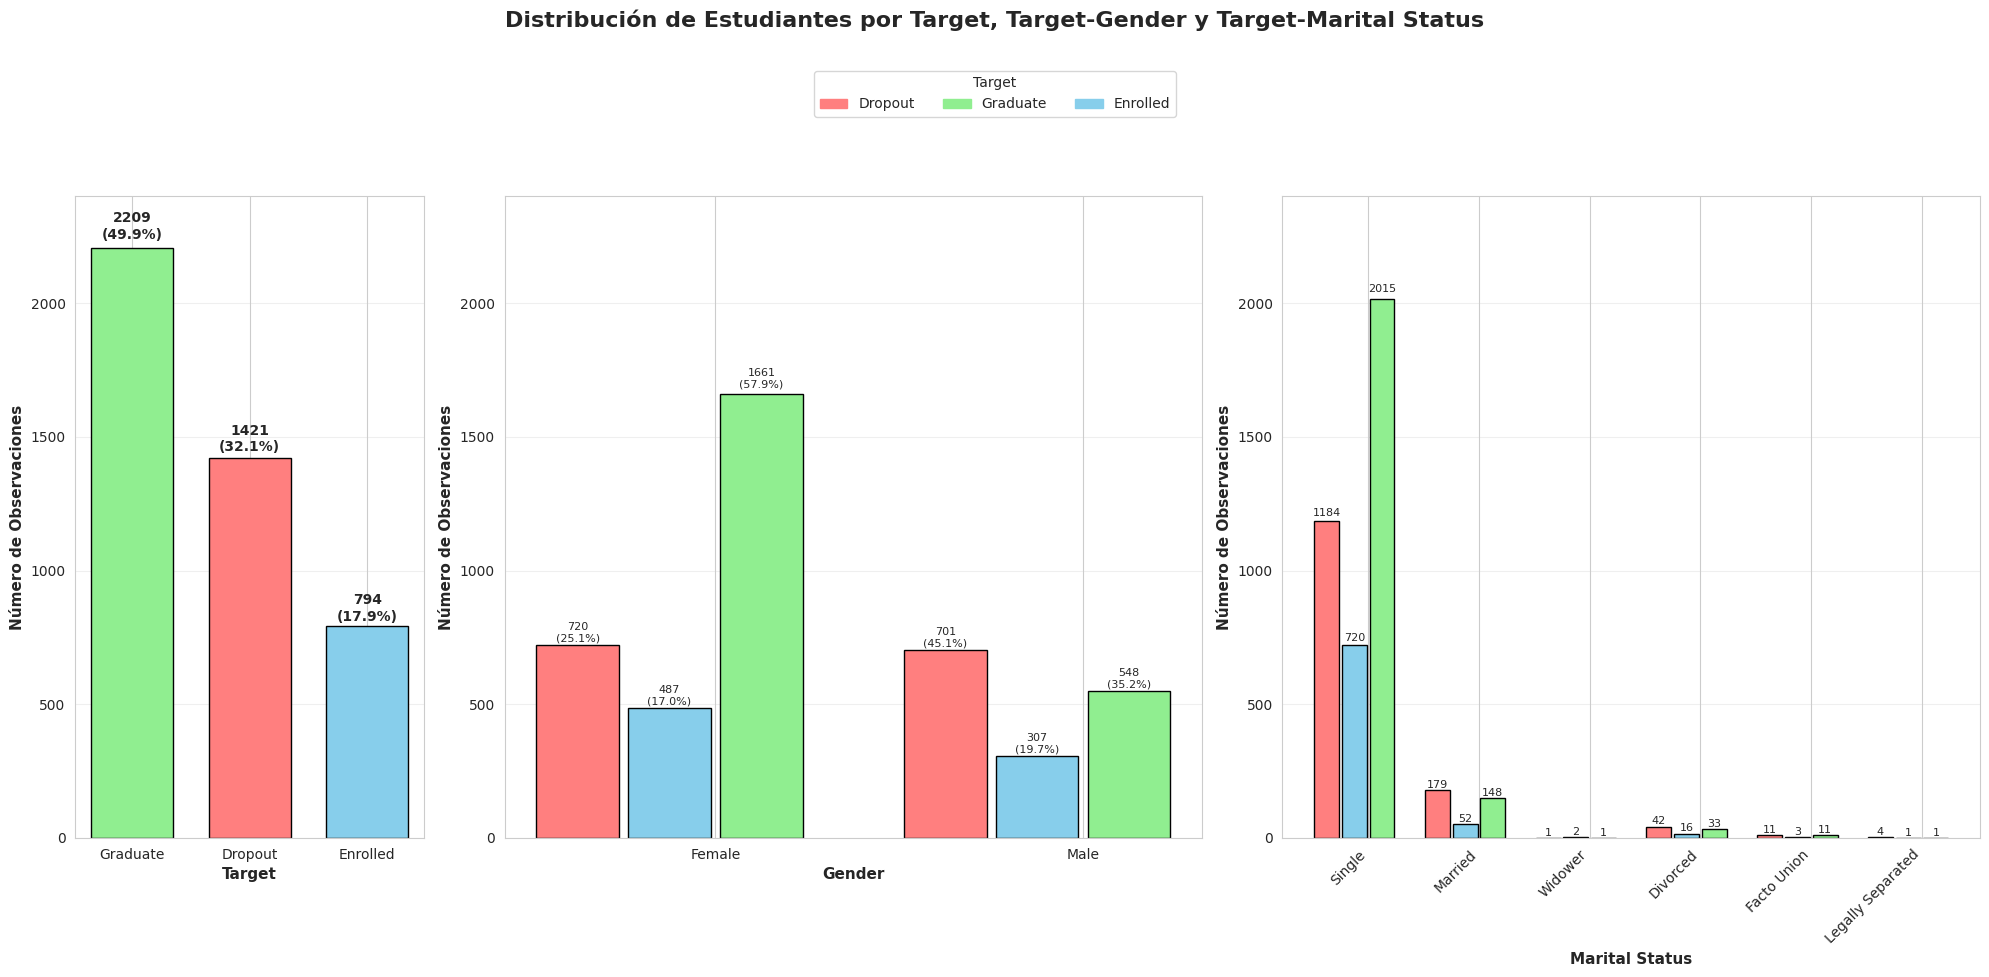

In [10]:
# Configurar estilo
sns.set_style("whitegrid")

# Definir anchos relativos: 1 para el primero, 2 para el segundo y tercero
fig, axes = plt.subplots(
    nrows=1, ncols=3,
    figsize=(20, 9),
    gridspec_kw={'width_ratios': [1, 2, 2]}  # Proporción de anchos
)

target_color_map = {
    'Dropout': '#ff7f7f',
    'Graduate': '#90ee90',
    'Enrolled': '#87ceeb'
}

marital_labels = {
    1: "Single",
    2: "Married",
    3: "Widower",
    4: "Divorced",
    5: "Facto Union",
    6: "Legally Separated"
}

# --- Subplot 1 ---
ax1 = axes[0]
status_counts = df['Target'].value_counts()
status_percentages = df['Target'].value_counts(normalize=True) * 100
plot_data1 = pd.DataFrame({
    'Target': status_counts.index,
    'Count': status_counts.values,
    'Percentage': status_percentages.values
})
colors1 = [target_color_map[t] for t in plot_data1['Target']]
bars1 = ax1.bar(plot_data1['Target'], plot_data1['Count'], width=0.7,
                color=colors1, edgecolor='black')
for i, bar in enumerate(bars1):
    h = bar.get_height()
    ax1.text(bar.get_x()+bar.get_width()/2, h+h*0.01,
             f"{int(h)}\n({plot_data1['Percentage'][i]:.1f}%)",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
ax1.set_xlabel('Target', fontsize=11, fontweight='bold')
ax1.set_ylabel('Número de Observaciones', fontsize=11, fontweight='bold')
ax1.set_ylim(0, 2400)
ax1.grid(axis='y', alpha=0.3)
# ax1.tick_params(axis='x', rotation=45)

# --- Subplot 2 ---
ax2 = axes[1]
cross_gender = pd.crosstab(df['Gender'], df['Target'])
gender_labels = {0: 'Female', 1: 'Male'}
x_pos = np.arange(len(cross_gender.index))
width = 0.25
for i, target in enumerate(cross_gender.columns):
    vals = cross_gender[target].values
    total_group = cross_gender.sum(axis=1).values
    ax2.bar(x_pos + i*width - (width*len(cross_gender.columns)/2),
            vals, width*0.9, color=target_color_map[target], edgecolor='black')
    for j, val in enumerate(vals):
        if val > 0:
            perc = val/total_group[j]*100
            ax2.text(x_pos[j] + i*width - (width*len(cross_gender.columns)/2),
                     val+val*0.01, f"{int(val)}\n({perc:.1f}%)",
                     ha='center', va='bottom', fontsize=8)
ax2.set_xlabel('Gender', fontsize=11, fontweight='bold')
ax2.set_ylabel('Número de Observaciones', fontsize=11, fontweight='bold')
ax2.set_ylim(0, 2400)
ax2.set_xticks(x_pos)
ax2.set_xticklabels([gender_labels[g] for g in cross_gender.index])
ax2.grid(axis='y', alpha=0.3)

# --- Subplot 3 ---
ax3 = axes[2]
cross_marital = pd.crosstab(df['Marital Status'], df['Target'])
x_pos = np.arange(len(cross_marital.index))
for i, target in enumerate(cross_marital.columns):
    vals = cross_marital[target].values
    ax3.bar(x_pos + i*width - (width*len(cross_marital.columns)/2),
            vals, width*0.9, color=target_color_map[target], edgecolor='black')
    for j, val in enumerate(vals):
        if val > 0:
            ax3.text(x_pos[j] + i*width - (width*len(cross_marital.columns)/2),
                     val+val*0.01, f"{int(val)}",
                     ha='center', va='bottom', fontsize=8)
ax3.set_xlabel('Marital Status', fontsize=11, fontweight='bold')
ax3.set_ylabel('Número de Observaciones', fontsize=11, fontweight='bold')
ax3.set_ylim(0, 2400)
ax3.set_xticks(x_pos)
ax3.set_xticklabels([marital_labels[m] for m in cross_marital.index], rotation=45, ha='right')
ax3.grid(axis='y', alpha=0.3)

# --- Leyenda general ---
handles = [plt.Rectangle((0, 0), 1, 1, color=target_color_map[t], edgecolor='black')
           for t in target_color_map]
labels = list(target_color_map.keys())
fig.legend(handles, labels, title='Target', loc='upper center',
           ncol=len(target_color_map), bbox_to_anchor=(0.5, 1.02))

fig.suptitle('Distribución de Estudiantes por Target, Target-Gender y Target-Marital Status', 
             fontsize=16, fontweight='bold', y=1.08)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()




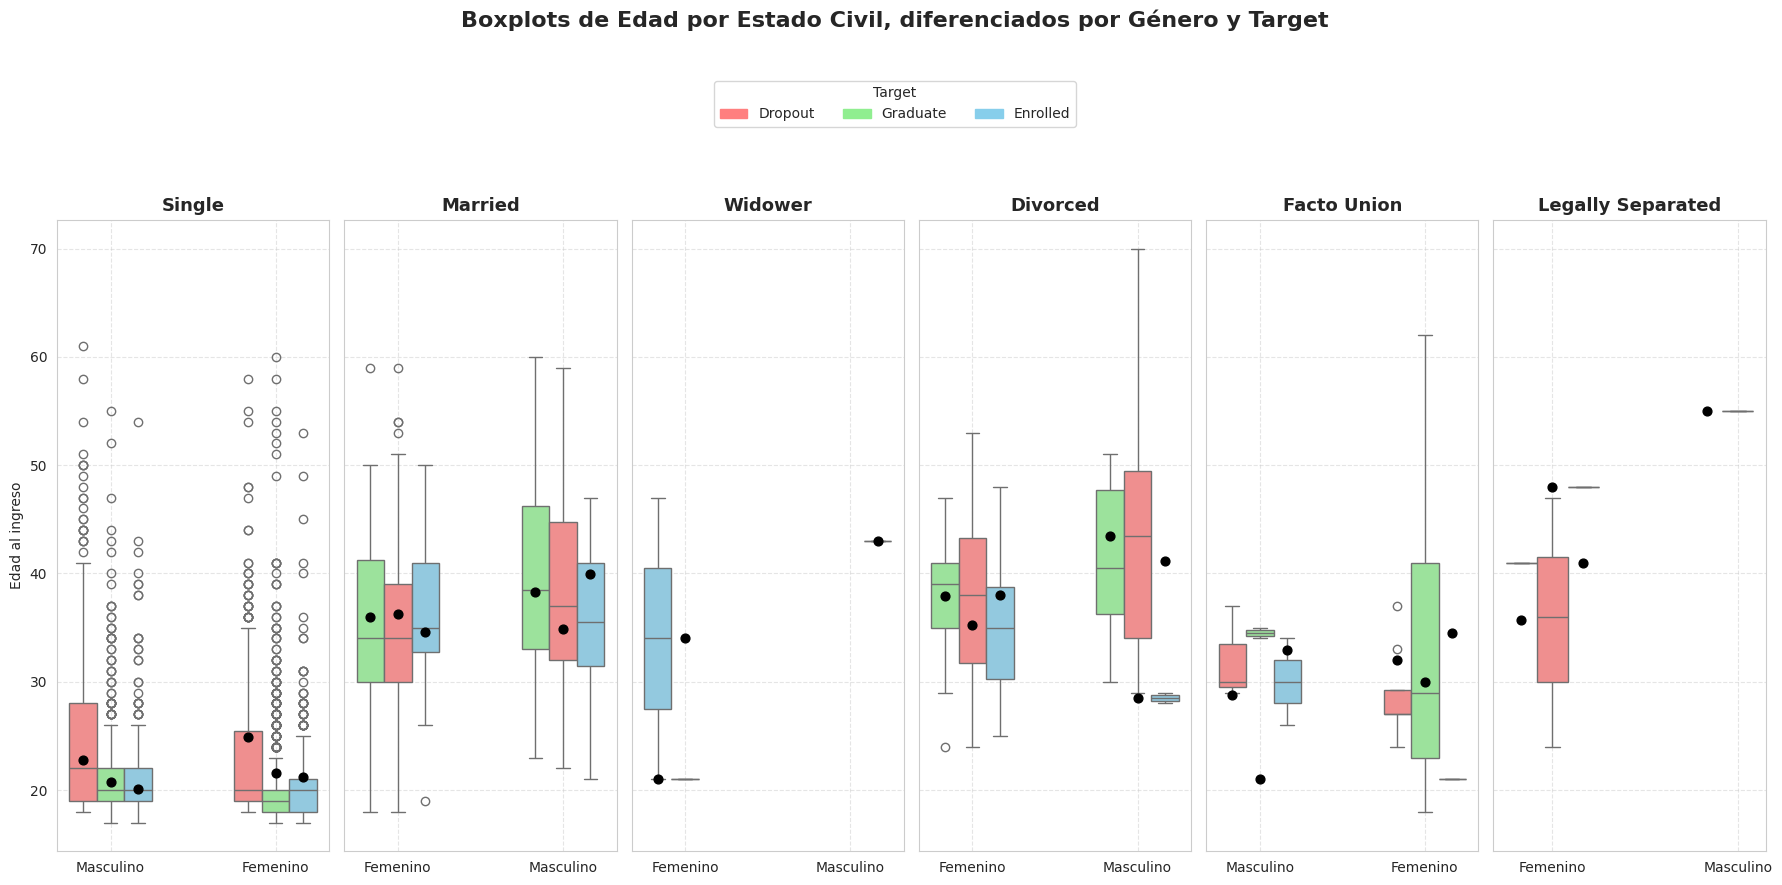

In [11]:
# Diccionario para los géneros
gender_labels = {1: "Masculino", 0: "Femenino"}

# Columnas opcionales con etiquetas de estado civil y género
df['Marital_Label'] = df['Marital Status'].map(marital_labels)
df['Gender_Label'] = df['Gender'].map(gender_labels)

# Crear figura 1x6
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 8), sharey=True)

# Subgráficos por estado civil
for ax, (marital_code, marital_label) in zip(axes, marital_labels.items()):
    subset = df[df['Marital Status'] == marital_code]

    # Dibujar boxplot
    sns.boxplot(
        data=subset,
        x='Gender_Label',
        y='Age at enrollment',
        hue='Target',
        ax=ax,
        palette=target_color_map,
        width=0.5
    )

    # Calcular y graficar medias
    hue_levels = list(subset['Target'].unique())
    gender_levels = list(subset['Gender_Label'].unique())
    positions = []
    means = []

    # Obtener posiciones reales de cada grupo en el gráfico
    # (igual lógica que seaborn: desplazamiento por hue)
    hue_count = len(hue_levels)
    box_width = 0.5
    offset = box_width / hue_count

    for i, gender in enumerate(sorted(gender_levels)):
        for j, target in enumerate(sorted(hue_levels)):
            group_data = subset[(subset['Gender_Label'] == gender) & (subset['Target'] == target)]
            if not group_data.empty:
                mean_val = group_data['Age at enrollment'].mean()
                x_pos = i + (j - (hue_count - 1) / 2) * offset
                ax.scatter(x_pos, mean_val, color='black', marker='o', s=40, zorder=3)

    ax.set_title(marital_label, fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Edad al ingreso' if ax == axes[0] else '')

    # Quitar leyenda individual
    if ax.get_legend():
        ax.get_legend().remove()

    # Ocultar etiquetas Y en subplots que no son el primero
    if ax != axes[0]:
        ax.tick_params(axis='y', left=False, labelleft=False)

    ax.tick_params(axis='x', rotation=0)
    ax.grid(True, linestyle='--', alpha=0.5)

# Leyenda general
handles = [plt.Rectangle((0, 0), 1, 1, color=target_color_map[t], edgecolor='black')
           for t in target_color_map]
labels = list(target_color_map.keys())
fig.legend(handles, labels, title='Target', loc='upper center',
           ncol=len(target_color_map), bbox_to_anchor=(0.5, 1.02))

# Título general
plt.suptitle('Boxplots de Edad por Estado Civil, diferenciados por Género y Target',
             fontsize=16, y=1.10, fontweight='bold')

# Ajustar espacios
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

De la figura 1, se puede establecer que cerca de 1 de cada 3 estudiantes (32.1%) abandona los estudios, así mismo, la tasa de abandono en las mujeres es significativamente inferior que en los hombres (25.1% vs 45.1%). Adicionalmente se puede evidenciar que la deserción en los estudiantes solteros es la más baja de todo el grupo, de acuerdo con el atributo *Marital Status*, seguido de los registrados como divorciados (46.7%) y los casados (47.2%).

Por otra parte, la figura 2 muestra los atributos *Gender*, *Marital Status* y *Target* frente a la variable *Age at enrollment*, y claramente evidencia que los estudiantes solteros presentan la distribución de edad más joven y homogénea (mediana ~22 años), mientras que los estudiantes divorciados muestran las edades más avanzadas (mediana ~43 años). En lo referente a *Gender*, la gráfica sugiere una ligera tendencia hacia edades superiores en estudiantes masculinos comparados con femeninos dentro de la mayoría de categorías de estado civil, particularmente notable en estudiantes casados y divorciados. Finalmente, en el análisis de los resutados académicos por grupo demográfico, los estudiantes de mayor edad (divorciados, separados legalmente) exhiben una mayor propensión al abandono (dropout), evidenciado por las distribuciones de edad más elevadas en esta categoría. Conversamente, los estudiantes más jóvenes (solteros) muestran distribuciones más equilibradas entre las tres categorías de resultado académico.

Teniendo en cuenta que el objetivo del proyecto es especificar un modelo que permita predecir tanto el éxito académico como el riesgo de abandono de los estudiantes, los escenarios que son de interés de este estudio son: 

    1. Target = "Dropout".
    2. Target = "Graduated" o Target = "Enrollment".

Por lo anterior, se procede con la especificación de una nueva variable *Dropout* con valores 1 (estudiantes que abandonaron) o 0 (estudiantes que terminaron satisfactoriamente o están matriculados). Con esta nueva variable se avanzará en el análisis exploratorio del conjunto de datos.

In [12]:
# Especificación de la variable Dropout

df['Dropout'] = np.where(df['Target'] == 'Dropout', 1, 0)
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,promedio_acumulado,Target,Marital_Label,Gender_Label,Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0.000000,0,10.8,1.4,1.74,0.000000,Dropout,Single,Masculino,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,13.666667,0,13.9,-0.3,0.79,13.833333,Graduate,Single,Masculino,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0.000000,0,10.8,1.4,1.74,0.000000,Dropout,Single,Masculino,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,12.400000,0,9.4,-0.8,-3.12,12.914286,Graduate,Single,Femenino,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,13.000000,0,13.9,-0.3,0.79,12.666667,Graduate,Married,Femenino,0


#### 1.4.2. Análisis Curricular

Complementando el análisis de los atributos de tipo demográfico, se abordará a continuación el análisis de características curriculares, que contempla *features* como: Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 2nd sem (enrolled), entre otras, para determinar el impacto de la carga académica (créditos) y la edad en el estatus final del estudiante.

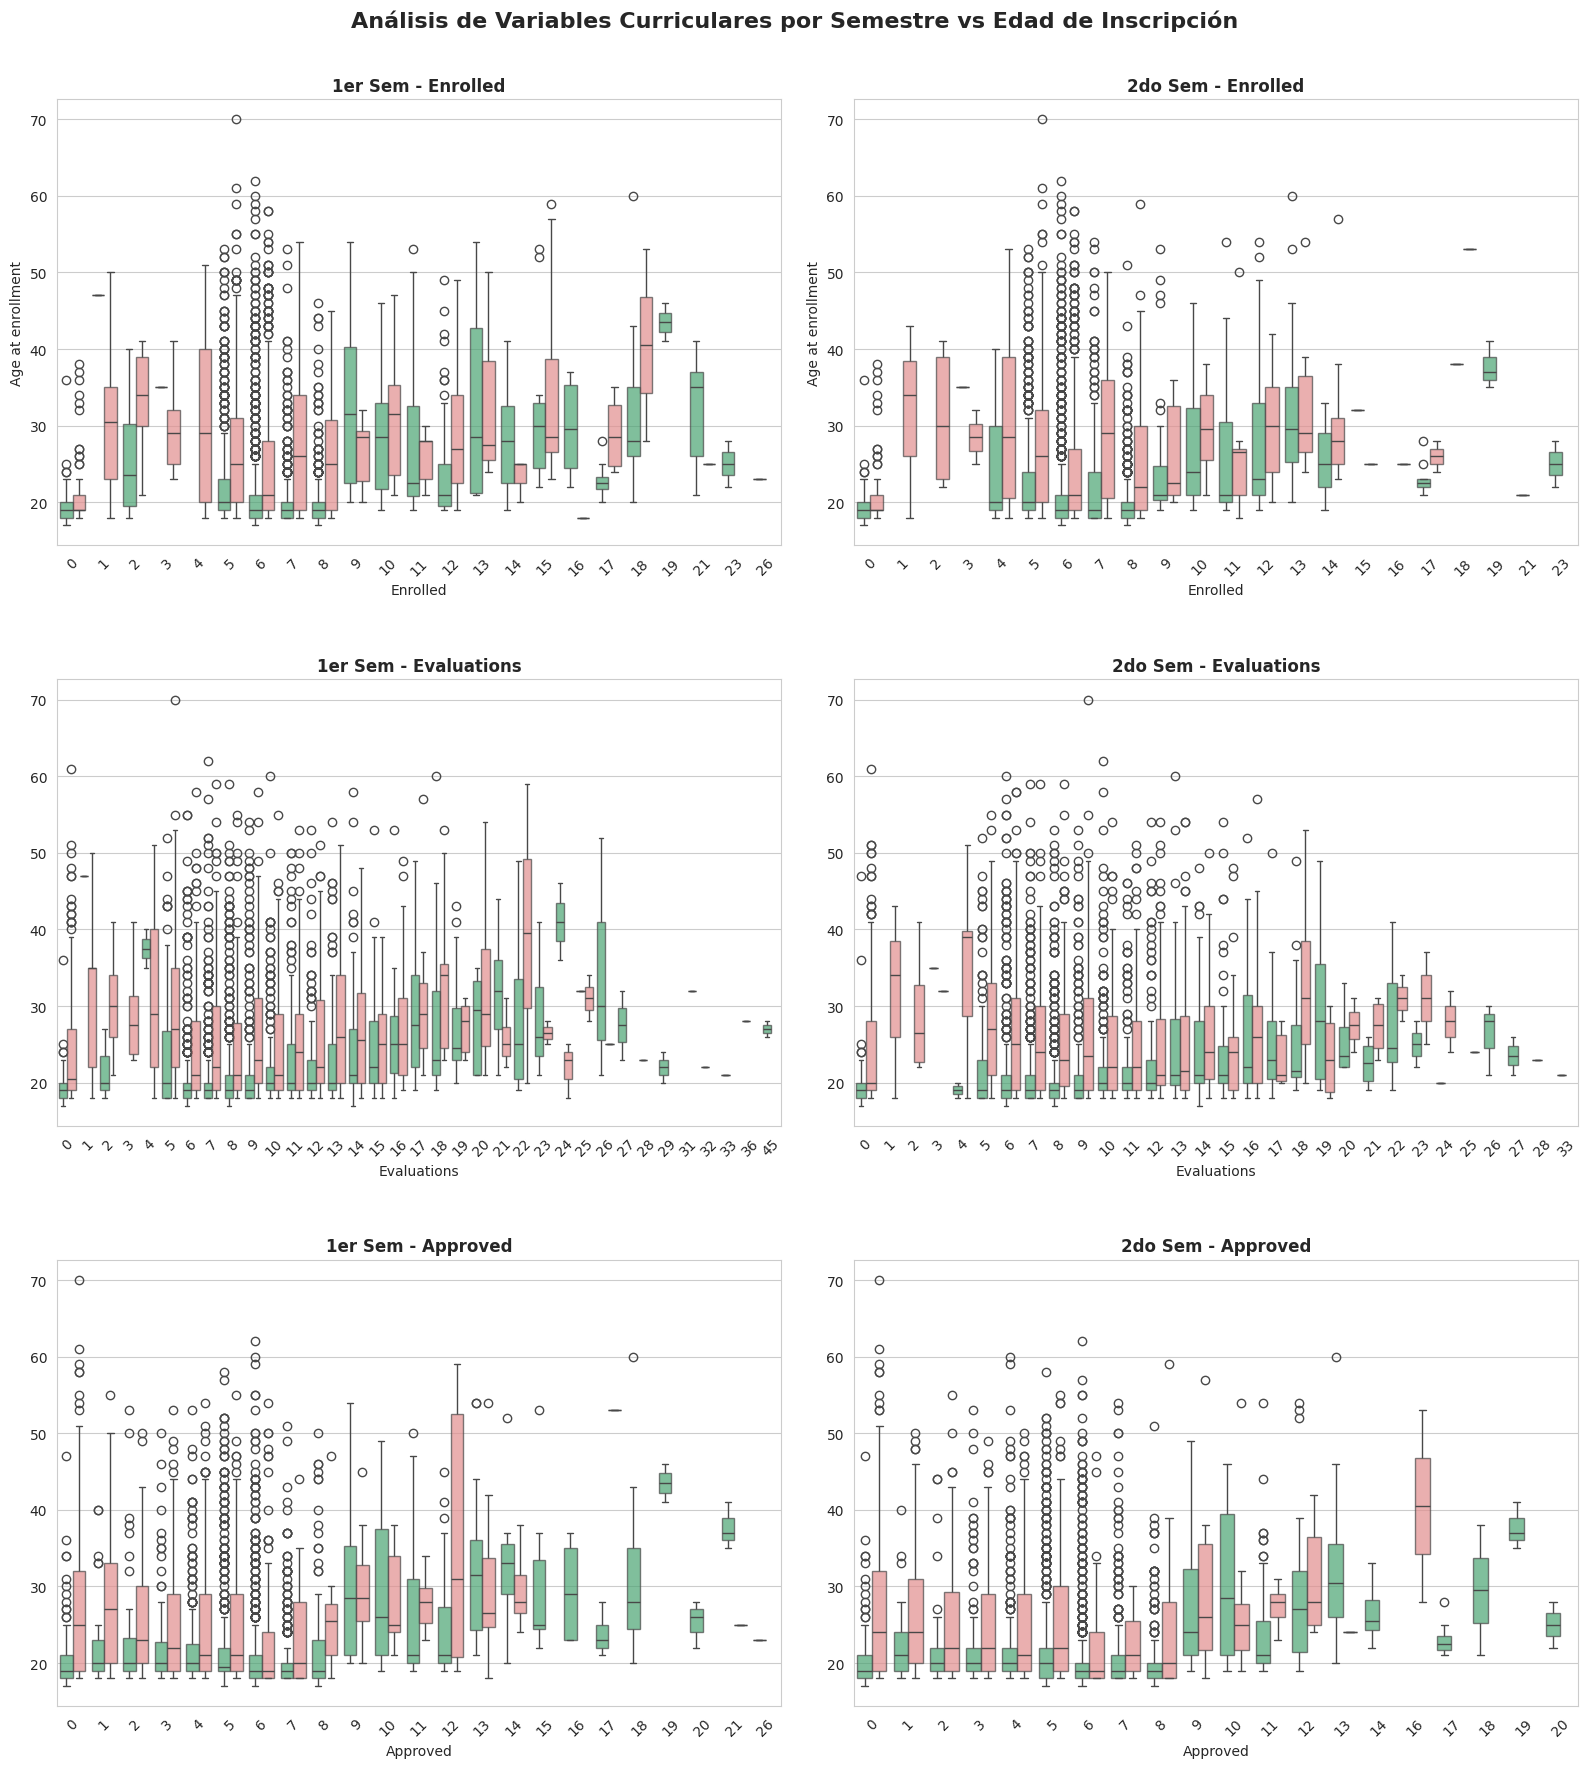

In [13]:
# Configurar la figura con subplots (2 filas, 4 columnas)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Análisis de Variables Curriculares por Semestre vs Edad de Inscripción', 
                fontsize=16, fontweight='bold', y=0.98)

# Variables del primer semestre (excluyendo grade)
first_sem_vars = [
    #'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)'
]

# Variables del segundo semestre (excluyendo grade)
second_sem_vars = [
    #'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (approved)'
]

# Crear etiquetas más cortas para los títulos
# short_labels = ['Credited', 'Enrolled', 'Evaluations', 'Approved']
short_labels = ['Enrolled', 'Evaluations', 'Approved']

# Definir colores para la variable Abandono
colors = ['mediumseagreen', 'lightcoral']  # 0: No abandona (azul), 1: Abandona (salmon)

# Primer semestre (fila 0)
for i, var in enumerate(first_sem_vars):
    ax = axes[i, 0]
    
    # Crear boxplot
    sns.boxplot(data=df, y='Age at enrollment', x=var, hue='Dropout', 
                ax=ax, palette=colors, boxprops=dict(alpha=0.7))
    
    # Personalizar el gráfico
    ax.set_title(f'1er Sem - {short_labels[i]}', fontsize=12, fontweight='bold')
    ax.set_xlabel(short_labels[i], fontsize=10)
    ax.set_ylabel('Age at enrollment' if i == 0 else '', fontsize=10)
    
    # Configurar la leyenda
    if i == 3:  # Solo mostrar leyenda en el último gráfico de la fila
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, ['No Abandona', 'Abandona'], title='Abandono', 
                    loc='upper right', fontsize=9)
    else:
        ax.get_legend().remove()
    
    # Rotar etiquetas del eje x si es necesario
    ax.tick_params(axis='x', rotation=45)

# Segundo semestre (fila 1)
for i, var in enumerate(second_sem_vars):
    ax = axes[i, 1]
    
    # Crear boxplot
    sns.boxplot(data=df, y='Age at enrollment', x=var, hue='Dropout',
                ax=ax, palette=colors, boxprops=dict(alpha=0.7))
    
    # Personalizar el gráfico
    ax.set_title(f'2do Sem - {short_labels[i]}', fontsize=12, fontweight='bold')
    ax.set_xlabel(short_labels[i], fontsize=10)
    ax.set_ylabel('Age at enrollment' if i == 0 else '', fontsize=10)
    
    # Configurar la leyenda
    if i == 3:  # Solo mostrar leyenda en el último gráfico de la fila
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, ['No Abandona', 'Abandona'], title='Abandono',
                    loc='upper right', fontsize=9)
    else:
        ax.get_legend().remove()
    
    # Rotar etiquetas del eje x si es necesario
    ax.tick_params(axis='x', rotation=45)

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.3, wspace=0.1)

# Mostrar el gráfico
plt.show()

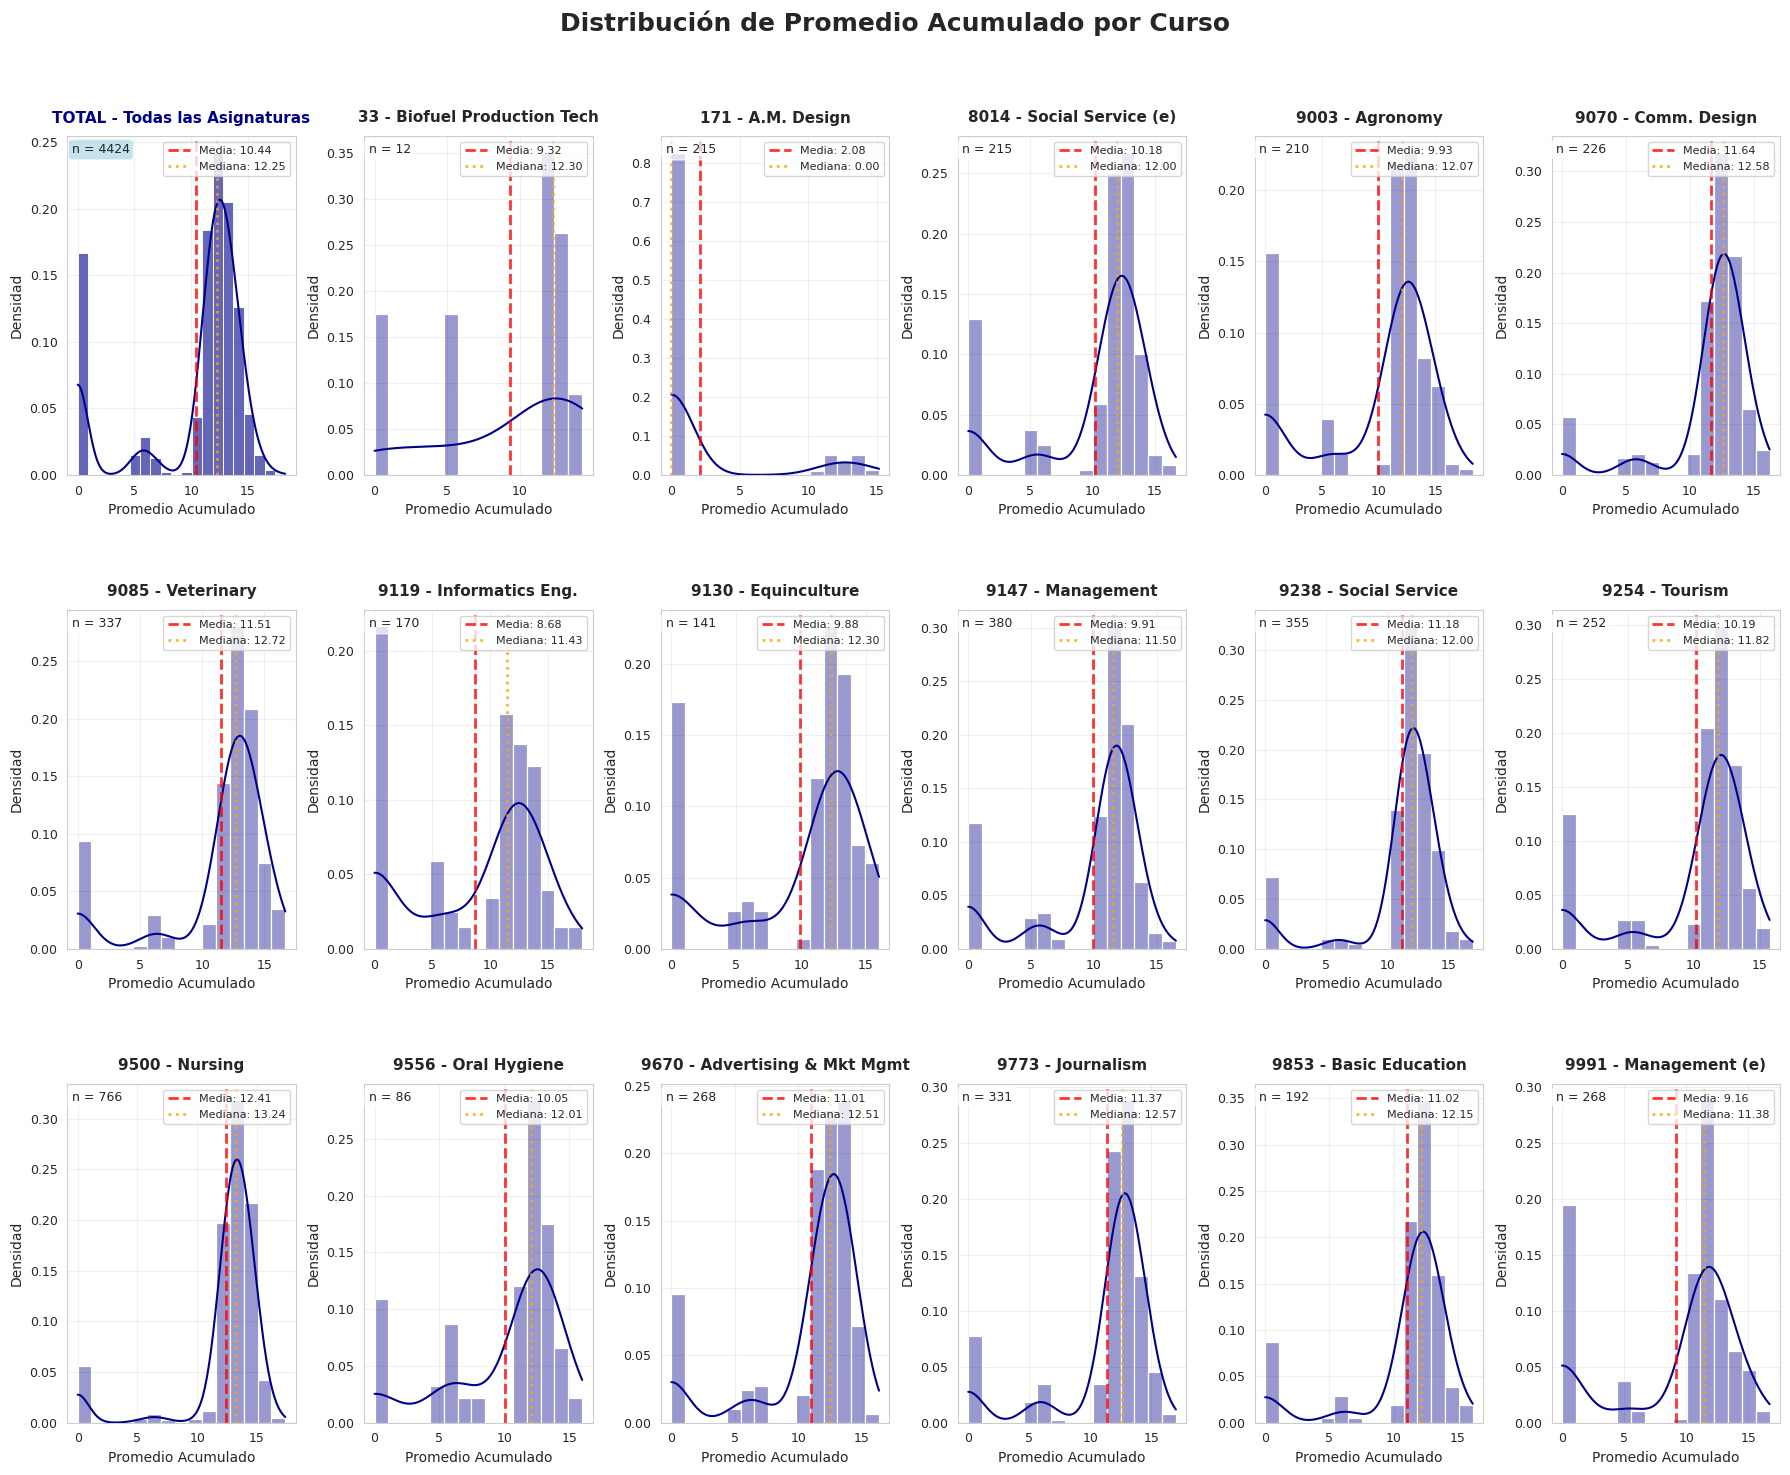

In [14]:
# Diccionario con las descripciones de los cursos
course_descriptions = {
    33: "Biofuel Production Tech",
    171: "A.M. Design", 
    8014: "Social Service (e)",
    9003: "Agronomy",
    9070: "Comm. Design",
    9085: "Veterinary",
    9119: "Informatics Eng.",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising & Mkt Mgmt",
    9773: "Journalism",
    9853: "Basic Education",
    9991: "Management (e)"
}

# Configurar el estilo
sns.set_style("whitegrid")

# Crear figura con subplots (3 filas, 6 columnas)
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 15))
axes = axes.flatten()  # Aplanar para facilitar iteración

# Obtener los cursos únicos ordenados
unique_courses = sorted(df['Course'].unique())

# Verificar que tenemos exactamente 17 cursos
if len(unique_courses) != 17:
    print(f"Advertencia: Se encontraron {len(unique_courses)} cursos, se esperaban 17")
    print(f"Cursos encontrados: {unique_courses}")

# Colores para las curvas de densidad
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_courses) + 1))

# PRIMER GRÁFICO: Distribución total de todas las asignaturas
ax = axes[0]
total_data = df['promedio_acumulado'].dropna()

if len(total_data) > 1:
    sns.histplot(data=total_data, kde=True, stat='density', 
                alpha=0.6, color='darkblue', ax=ax, bins=20)
    
    # Estadísticas básicas
    mean_val = total_data.mean()
    median_val = total_data.median()
    
    # Líneas verticales para media y mediana
    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, 
                linewidth=2, label=f'Media: {mean_val:.2f}')
    ax.axvline(median_val, color='orange', linestyle=':', alpha=0.8, 
                linewidth=2, label=f'Mediana: {median_val:.2f}')
    
    # Leyenda
    ax.legend(fontsize=8, loc='upper right')

# Configurar título para distribución total
ax.set_title('TOTAL - Todas las Asignaturas', fontsize=11, fontweight='bold', 
            pad=10, color='darkblue')
ax.set_xlabel('Promedio Acumulado', fontsize=10)
ax.set_ylabel('Densidad', fontsize=10)
ax.tick_params(axis='both', labelsize=9)
ax.grid(True, alpha=0.3)

# Agregar información de n total
n_total = len(total_data)
ax.text(0.02, 0.98, f'n = {n_total}', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', 
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))

# Crear gráficos de densidad para cada curso (posiciones 1-17)
for i, course in enumerate(unique_courses):
    ax_idx = i + 1  # Empezar en posición 1 (la 0 es para el total)
    
    if ax_idx >= 18:  # Solo usar hasta la posición 17
        break
        
    ax = axes[ax_idx]
    
    # Filtrar datos por curso
    course_data = df[df['Course'] == course]['promedio_acumulado'].dropna()
    
    # Crear gráfico de densidad
    if len(course_data) > 1:  # Necesitamos al menos 2 puntos para densidad
        sns.histplot(data=course_data, kde=True, stat='density', 
                    alpha=0.4, color="darkblue", ax=ax, bins=15)
        
        # Estadísticas básicas
        mean_val = course_data.mean()
        median_val = course_data.median()
        
        # Líneas verticales para media y mediana
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, 
                    linewidth=2, label=f'Media: {mean_val:.2f}')
        ax.axvline(median_val, color='orange', linestyle=':', alpha=0.8, 
                    linewidth=2, label=f'Mediana: {median_val:.2f}')
        
        # Leyenda
        ax.legend(fontsize=8, loc='upper right')
        
    else:
        # Si no hay suficientes datos, mostrar mensaje
        ax.text(0.5, 0.5, 'Datos insuficientes', ha='center', va='center', 
                transform=ax.transAxes, fontsize=12)
    
    # Configurar título con descripción del curso
    course_desc = course_descriptions.get(course, f'Curso {course}')
    ax.set_title(f'{course} - {course_desc}', fontsize=11, fontweight='bold', 
                pad=10, wrap=True)
    
    # Configurar etiquetas
    ax.set_xlabel('Promedio Acumulado', fontsize=10)
    ax.set_ylabel('Densidad', fontsize=10)
    
    # Mejorar formato
    ax.tick_params(axis='both', labelsize=9)
    ax.grid(True, alpha=0.3)
    
    # Agregar información de n
    n_students = len(course_data)
    ax.text(0.02, 0.98, f'n = {n_students}', transform=ax.transAxes, 
            fontsize=9, verticalalignment='top', 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

# Título general
fig.suptitle('Distribución de Promedio Acumulado por Curso', 
                fontsize=18, fontweight='bold', y=0.98)

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()

En el análisis de los gráficos de la figura 3, se observa consistentemente que los estudiantes que no abandonan (representados en verde) tienden a inscribirse en mayor número de unidades curriculares y mantener niveles de participación académica más elevados en comparación con aquellos que abandonan (representados en rosa/rojo). Esta diferencia es particularmente pronunciada en las variables de inscripción y evaluaciones. Sobre la distribución etaria, los datos revelan que los estudiantes de mayor edad muestran patrones de carga académica más conservadores, especialmente notable en los mayores de 40 años, quienes tienden a inscribirun menor número de créditos académicos.

La figura 4, corresponde a un gráfico de densidad que muestra la distribución de la variable "promedio_acumulado" tanto para el total de la muestra como para cada uno de los cursos contemplados en el ejercicio. La tabla 1 resume el análisis de esta figura:

| Programa / Código                       | Forma de distribución      | Relación media vs. mediana                | Posibles implicaciones académicas |
|------------------------------------------|-----------------------------|--------------------------------------------|------------------------------------|
| 171 - Animation and Multimedia Design    | Asimétrica positiva extrema | Media >> Mediana (mediana = 0)             | Mayoría con rendimiento nulo, alto riesgo académico generalizado. |
| 9119 - Informatics Engineering           | Bimodal                     | Mediana > Media                            | Presencia de estudiantes con bajo rendimiento que afectan la media. |
| 9853 - Basic Education                   | Bimodal                     | Mediana > Media                            | Segmentación clara de rendimiento, se requiere intervención para el grupo de bajo desempeño. |
| TOTAL - Todas las Asignaturas            | Bimodal                     | Mediana > Media                            | Existen dos grupos: alto rendimiento y bajo rendimiento, posible segmentación para intervenciones. |
| 9773 - Journalism and Communication      | Bimodal                     | Mediana > Media                            | Dos grupos diferenciados, uno con alto y otro con bajo rendimiento. |
| 9085 - Veterinary Nursing                | Bimodal                     | Mediana > Media                            | Dos subgrupos de desempeño, intervención focalizada en el grupo con bajas notas. |
| 8014 - Social Service (evening)          | Asimétrica positiva         | Mediana > Media                            | Grupo de bajo rendimiento que reduce la media, posible necesidad de refuerzo académico. |
| 9003 - Agronomy                          | Asimétrica positiva         | Mediana > Media                            | Algunos estudiantes con bajo desempeño afectan el promedio general. |
| 9147 - Management                        | Asimétrica positiva         | Mediana > Media                            | Parte del grupo con bajo rendimiento, atención a casos rezagados. |
| 9238 - Social Service                    | Asimétrica positiva         | Mediana > Media                            | Desempeño general alto con minoría en bajo rendimiento. |
| 9254 - Tourism                           | Asimétrica positiva         | Mediana > Media                            | Desempeño estable pero con un grupo pequeño en riesgo. |
| 9991 - Management (evening)              | Asimétrica positiva         | Mediana > Media                            | Rendimiento aceptable en la mayoría, algunos casos con notas muy bajas. |
| 33 - Biofuel Production Technologies     | Asimétrica negativa         | Media < Mediana                            | Rendimiento relativamente homogéneo pero con pocos datos, sensibilidad a valores extremos. |
| 9130 - Equiculture                       | Asimétrica negativa         | Media < Mediana                            | Tendencia a buen rendimiento con pocos casos bajos, bajo riesgo académico. |
| 9070 - Communication Design              | Relativamente simétrica     | Media ≈ Mediana                            | Rendimiento estable y homogéneo, bajo riesgo académico. |
| 9500 - Nursing                           | Relativamente simétrica     | Media ≈ Mediana                            | Alto rendimiento homogéneo, buen desempeño global. |
| 9556 - Oral Hygiene                      | Relativamente simétrica     | Media ≈ Mediana                            | Buen desempeño general, baja dispersión de notas. |
| 9670 - Advertising & Marketing Mgmt      | Relativamente simétrica     | Media ≈ Mediana                            | Alto rendimiento uniforme, baja tasa de riesgo. |

#### 1.4.3. Resumen Descriptivo y Matriz de Correlación

In [28]:
# 2. Identificar tipos de variables
variable_types = identify_variable_types(X)

# Variable a mover. Tiene pocos valores únicos por lo que la función la evalúa como variable categórica.
var_to_move = 'Curricular units 2nd sem (without evaluations)'

variable_types['categorical'].remove(var_to_move)
variable_types['discrete'].append(var_to_move)



In [30]:
# Resumen descriptivo

# Unir atributos continuos y discretos
num_vars = variable_types['continuous'] + variable_types['discrete']

# Resumen descriptivo de las variables numéricas.
numeric_X = X[num_vars]

desc_df = numeric_X.describe().T.reset_index()
desc_df.rename(columns={'index': 'variable_name'}, inplace=True)
desc_df

,variable_name,count,mean,std,min,25%,50%,75%,max
0,Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
1,Admission grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
2,Curricular units 1st sem (grade),4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000
3,Curricular units 2nd sem (grade),4424.0,10.230206,5.210808,0.00,10.75,12.200000,13.333333,18.571429
4,Unemployment rate,4424.0,11.566139,2.663850,7.60,9.40,11.100000,13.900000,16.200000
5,Inflation rate,4424.0,1.228029,1.382711,-0.80,0.30,1.400000,2.600000,3.700000
6,GDP,4424.0,0.001969,2.269935,-4.06,-1.70,0.320000,1.790000,3.510000
7,promedio_acumulado,4424.0,10.435514,4.818530,0.00,11.00,12.250000,13.266667,18.283654
8,Age at enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
9,Curricular units 1st sem (credited),4424.0,0.709991,2.360507,0.00,0.00,0.000000,0.000000,20.000000


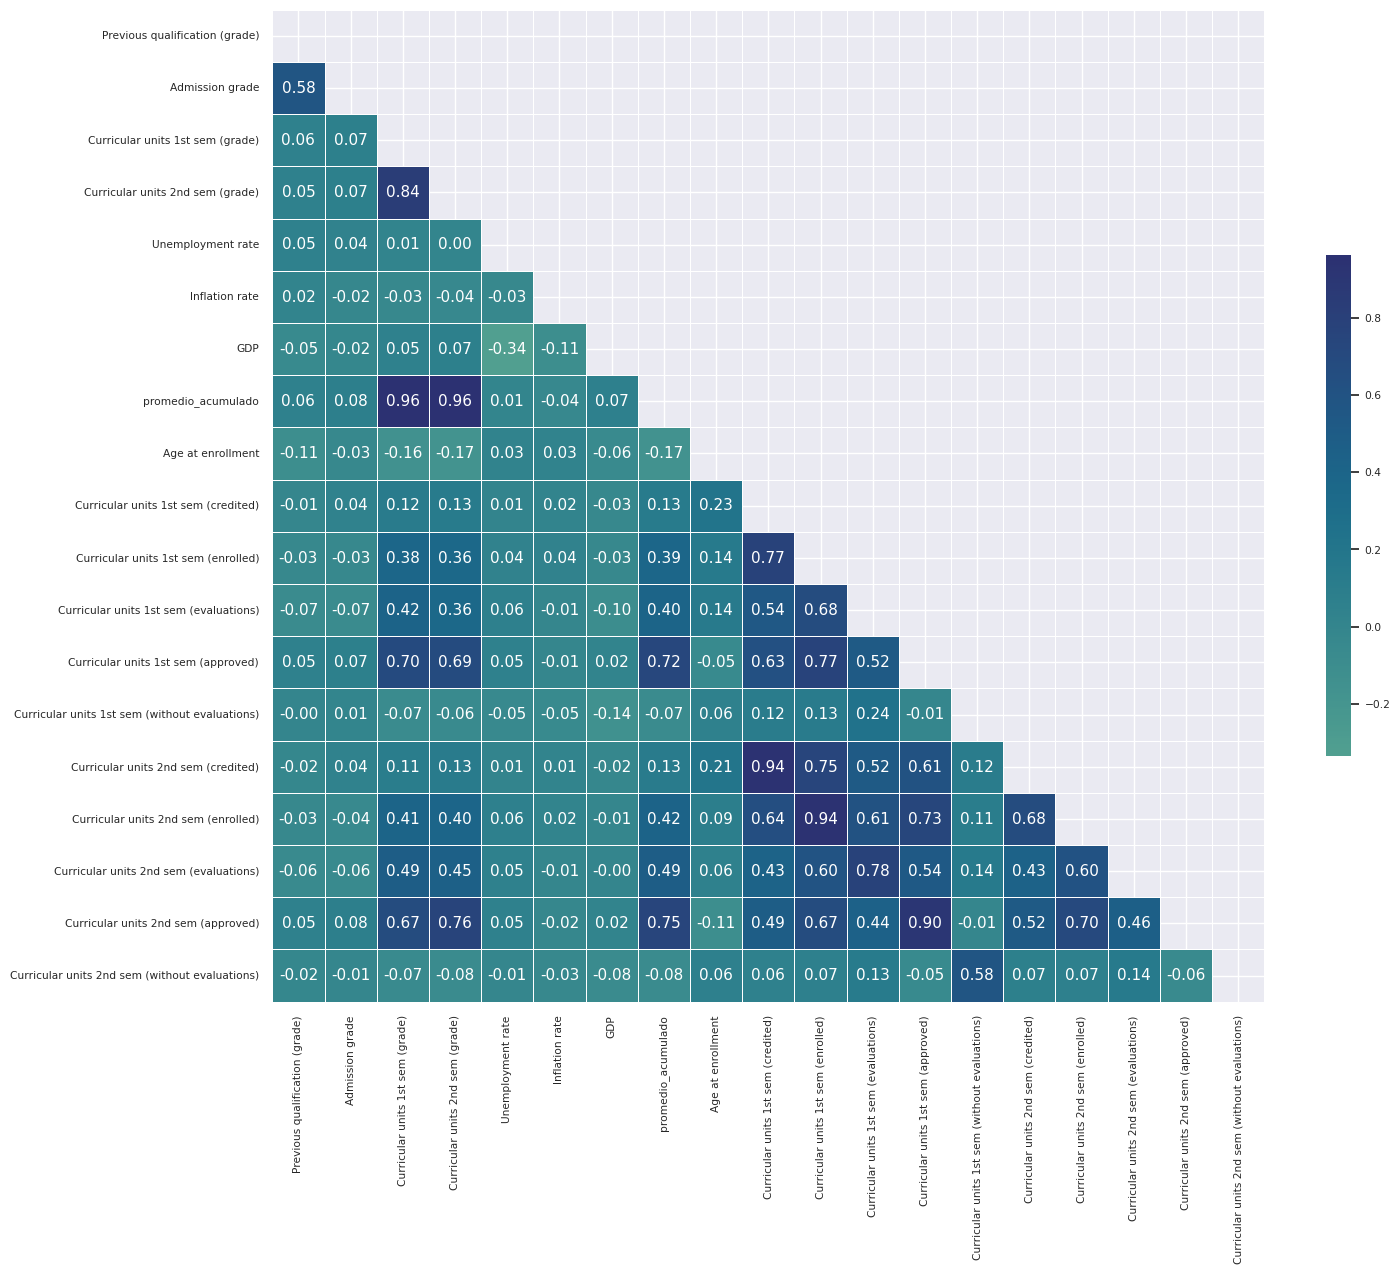

In [31]:


# Generacieon de los coeficientes de correlación
CorMatrix = X[num_vars].corr()

# Crear una máscara para los valores que están en la diagonal principal y sobre ella.
mask = np.triu(np.ones_like(CorMatrix, dtype=bool))  # Actualiza dtype=np.bool -> dtype=bool (evita warning)

# Fijar las dimensiones del gráfico
fig_width = 16
fig_height = int(fig_width * 0.82)  # proporcional

# Definir la variable asociada al gráfico
f, ax = plt.subplots(figsize=(fig_width, fig_height))

# Esquema de colores a utilizar
# cmap = "viridis"
cmap = "crest"

# Ajustes del heatmap
sns.set(font_scale=0.7)
ax = sns.heatmap(
    CorMatrix,
    mask=mask,
    cmap=cmap,
    center=0,
    annot=True, 
    annot_kws={"size": 11}, 
    square=True,
    linewidths=0.5,
    fmt='.2f',
    cbar_kws={"shrink": 0.5}
)

# Visualización de la matriz
plt.show()

La matriz de la figura 4, muestra los coeficientes de correlación entre las variables continuas del resumen descriptivo, destacando los siguientes aspectos:

* La clara correlación fuerte y positiva entre las calificaciones del primer y segundo semestre, y entre cada una de estas con el promedio acumulado.

* La correlación moderada positiva (r = 0.58) entre calificación previa y nota de admisión sugiere que los antecedentes académicos son predictores razonables del desempeño en el proceso de admisión, aunque existe variabilidad suficiente para considerar ambas variables como complementarias.

* Las correlaciones negativas débiles de la edad con las calificaciones semestrales (r = -0.16 y -0.17) sugieren una tendencia leve hacia menor rendimiento académico en estudiantes de mayor edad, posiblemente reflejando diferentes dinámicas de aprendizaje o responsabilidades adicionales.

* Las variables económicas (*Unemployment rate*, *Inflation rate*, *GDP*) muestran correlaciones prácticamente nulas con las variables académicas (r ≈ 0.00 a 0.07), revelando que los indicadores económicos o condiciones del mercado laboral no tienen asociación directa con el rendimiento individual estudiantil en esta muestra.

De este modo, se da fin al análisis exploratorio de la muestra para dar continuidad con el pre-procesamiento de los datos y la eventual construcción y evaluación del modelo.